In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2]:
df.dropna(inplace = True)

In [3]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
catvar = df.select_dtypes(include = ['object']).columns
numvar = df.select_dtypes(include = ['float64']).columns
catvar,numvar

(Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Unnamed: 0', 'Price'], dtype='object'))

In [6]:
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight','Price']]
#df.head()

In [7]:
'''def uniquevals(col):
 a = df[col].unique()
 print(f'Details of the particular col {col} is:{a}')
    
def valuecount(col):
  b = df[col].value_counts()
  print(f'valuecounts of the particular col {col} is:{b}')  

for col in df.columns:
    uniquevals(col)
    print("-"*75)'''

'def uniquevals(col):\n a = df[col].unique()\n print(f\'Details of the particular col {col} is:{a}\')\n    \ndef valuecount(col):\n  b = df[col].value_counts()\n  print(f\'valuecounts of the particular col {col} is:{b}\')  \n\nfor col in df.columns:\n    uniquevals(col)\n    print("-"*75)'

clearing the dataset

In [8]:
df['Ram'] = df['Ram'].str.replace('GB',' ')
df['Weight'] = df['Weight'].str.replace('kg',' ')
df['Weight'] = df['Weight'].replace('?', float('0'))

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('Float64')
#df.head()

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
 
#sn.distplot(df['Price'],color = 'red')

Plotting countplots for the categorical variables 

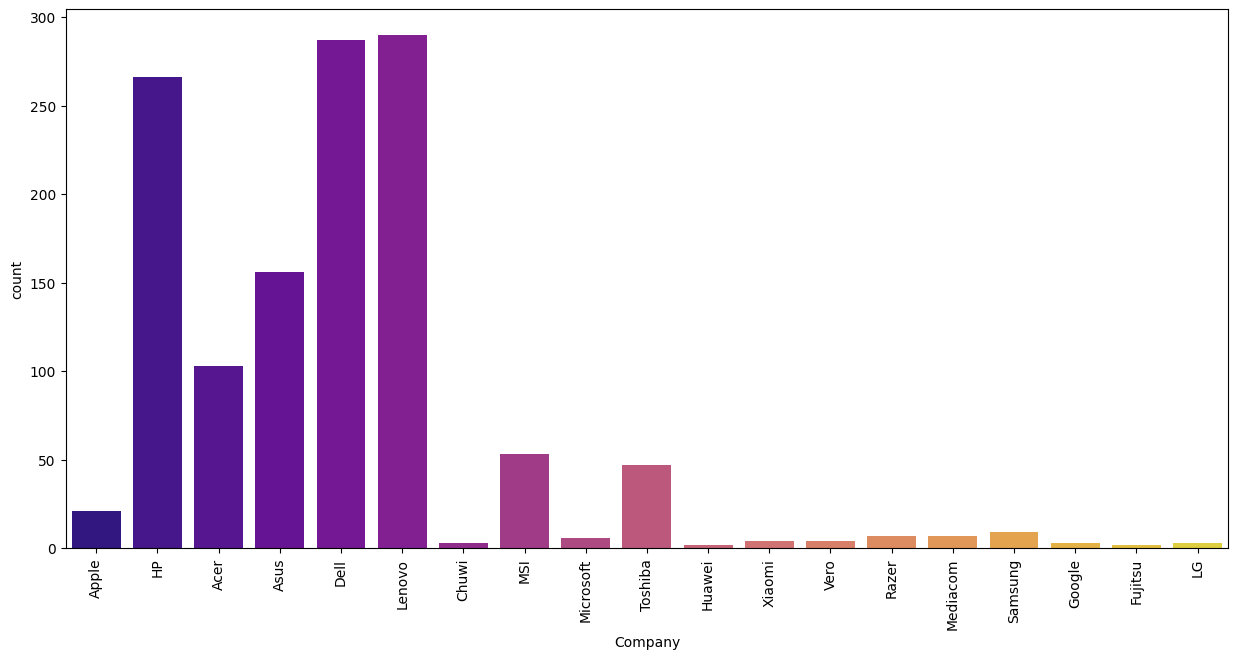

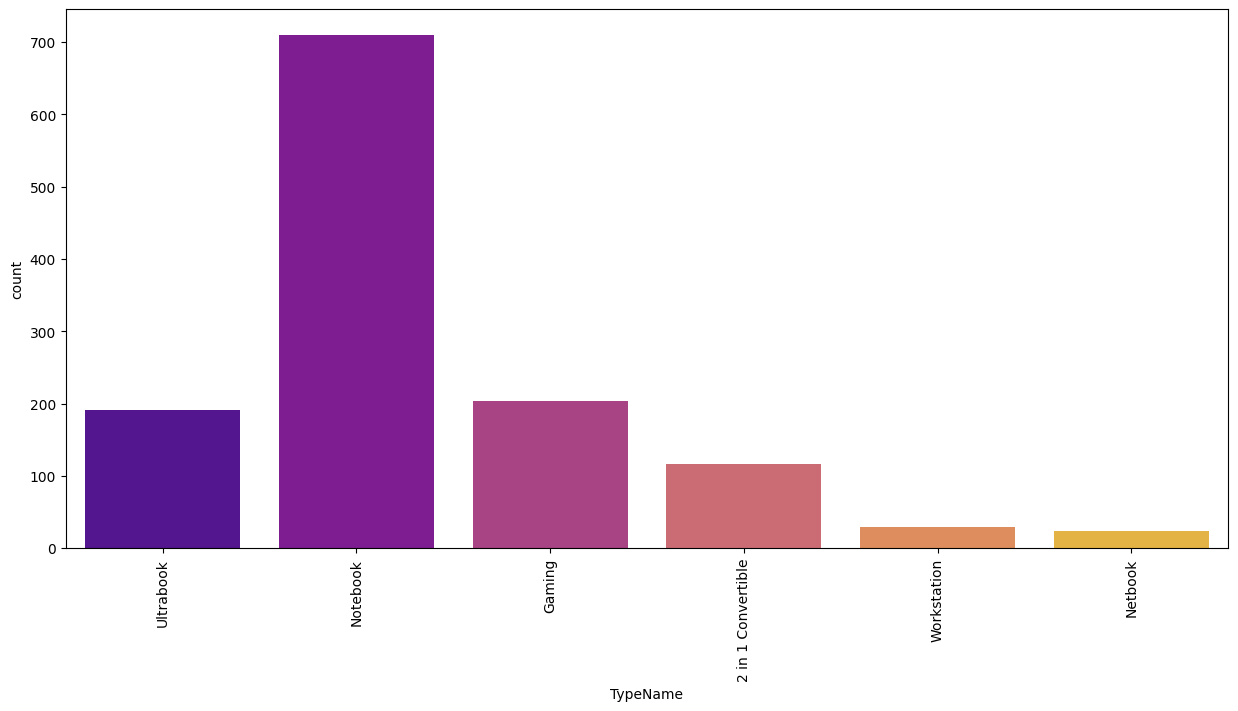

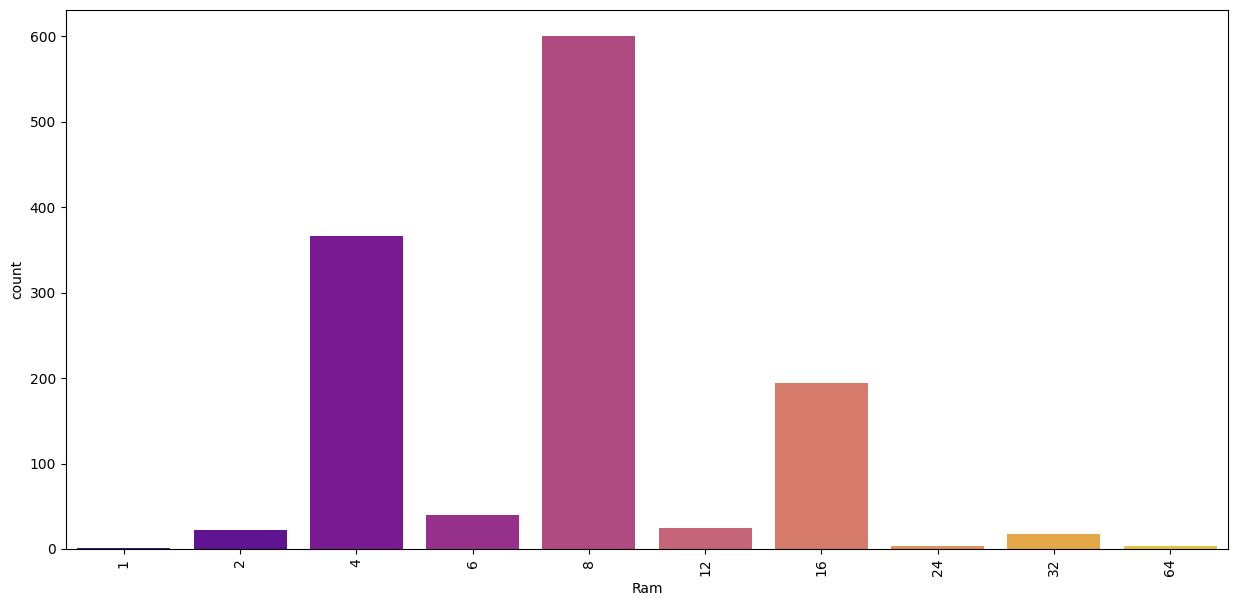

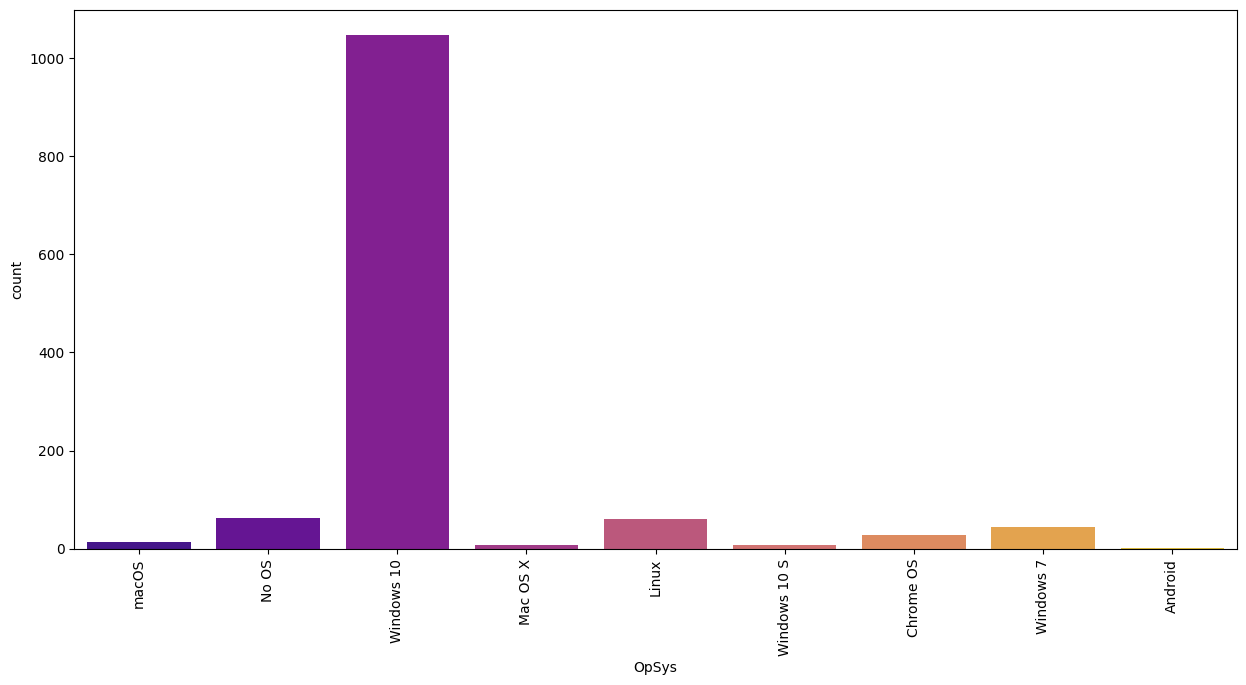

In [10]:
#df['brand'] = df['brand'].astype('int32')

def drawplot(col):
    plt.figure(figsize = (15,7))
    sn.countplot( x=col,data = df , palette = 'plasma')
    plt.xticks(rotation = 'vertical')
    
toview = ['Company','TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

In [11]:
'''plt.figure(figsize = (15,7))
sn.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')'''

"plt.figure(figsize = (15,7))\nsn.barplot(x=df['Company'],y=df['Price'])\nplt.xticks(rotation = 'vertical')"

In [12]:
'''sn.scatterplot(x = df['Inches'],y = df['Price'])'''

"sn.scatterplot(x = df['Inches'],y = df['Price'])"

**Converting screen resolution into 3 parts touchscreen ,ip panel and normal**

In [13]:
''' df['ScreenResolution'].value_counts()'''

" df['ScreenResolution'].value_counts()"

In [14]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda element:1
                                                        if 'Touchscreen' in element else 0)
#df.tail()

In [15]:

'''sn.countplot(x='Touchscreen',data = df ,Palette ='plasma')'''


'''sn.barplot(x = df['Touchscreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')'''

"sn.barplot(x = df['Touchscreen'],y = df['Price'])\nplt.xticks(rotation = 'vertical')"

Splitting the data

In [16]:
splitdf = df['ScreenResolution'].str.split('x',n=1,expand = True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [17]:
df['x_res'] = splitdf[0]
df['y_res'] = splitdf[1]

df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [18]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

df['Inches'] = df['Inches'].replace('?',float('0'))
df['Inches'] = df['Inches'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   Float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  x_res             1273 non-null   int64  
 13  y_res             1273 non-null   int64  
dtypes: Float64(1), float64(2), int32(1), int64(3), object(7)
memory usage: 145.5+ KB


In [19]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'x_res',
       'y_res'],
      dtype='object')

In [20]:
'''a=['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'x_res',
       'y_res']
if(dtype(df[a]==(int32,int64,Float64)):
 plt.figure(figsize = (15,7))
 sn.heatmap(df.corr(),annote = True,cmap = 'plasma')'''

"a=['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',\n       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'x_res',\n       'y_res']\nif(dtype(df[a]==(int32,int64,Float64)):\n plt.figure(figsize = (15,7))\n sn.heatmap(df.corr(),annote = True,cmap = 'plasma')"

In [21]:
numeric_df = df.select_dtypes(include=['number'])
b = numeric_df.corr()
numeric_df.corr()['Price']


Inches         0.032713
Ram            0.685648
Weight         0.174525
Price          1.000000
Touchscreen    0.188994
x_res          0.557556
y_res          0.554069
Name: Price, dtype: float64

In [22]:
'''plt.figure(figsize = (15,7))
sn.heatmap(b,annot= True,cmap = 'plasma')'''

"plt.figure(figsize = (15,7))\nsn.heatmap(b,annot= True,cmap = 'plasma')"

In [23]:
df['PPI'] = ((df['x_res']**2 + df['y_res']**2)**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [24]:
df.drop(columns = ['ScreenResolution','Inches','x_res','y_res'],axis = 1,inplace =True)
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005


**Clearing Cpu**

In [25]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [26]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5


In [27]:
def proceesortype(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text =='Intel Core i3':
        return text
    
    else:
        if text.split()[0] == 'Intel':
            return 'other intel core'
        else:
            return 'Amd processor'
df['Cpu_brand'] = df['CPU_name'].apply(lambda text:proceesortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,CPU_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,Intel Core i5


In [28]:
df['Cpu_brand'].value_counts()

Cpu_brand
Intel Core i7       515
Intel Core i5       410
other intel core    151
Intel Core i3       134
Amd processor        63
Name: count, dtype: int64

In [29]:
df.drop(columns =['Cpu','CPU_name'],inplace = True )
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5


In [30]:
'''plt.figure(figsize = (10,6))
sn.countplot(data = df,x = 'Cpu_brand', palette = 'plasma')
df.xticks(rotation = 'vertical')
plt.show()'''

"plt.figure(figsize = (10,6))\nsn.countplot(data = df,x = 'Cpu_brand', palette = 'plasma')\ndf.xticks(rotation = 'vertical')\nplt.show()"

In [31]:
'''sn.barplot(x = df['Cpu_brand'],y= df['Price'])
plt.xticks(rotation = 'vertical')'''

"sn.barplot(x = df['Cpu_brand'],y= df['Price'])\nplt.xticks(rotation = 'vertical')"

# ***Analyise on the Ram Column***

In [32]:
#df['Ram'].value_counts()

In [33]:
#plt.figure(figsize = (15,7))
#sn.countplot(data=df,x='Ram',palette = 'plasma')

In [34]:
#sn.barplot(x=df['Ram'],y =  df['Price'])

# **Analysis of memory column**

In [35]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [36]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split("+",n=1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [37]:
df['First'] = newdf[0]
df['First'] = df['First'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,First
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,256 SSD


In [38]:
listapply = ['SSD','HDD','Flash Storage','Hybrid']
def applichanges(value):
    df['layer '+ value] = newdf[0].apply(lambda x:1 if value in x else 0)

for value in listapply :
    applichanges(value)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,First,layer SSD,layer HDD,layer Flash Storage,layer Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,128 SSD,1,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,128 Flash Storage,0,0,1,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,256 SSD,1,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,512 SSD,1,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,256 SSD,1,0,0,0


In [39]:
df['First'] = df['First'].str.replace('?','0')
df['First'] = df['First'].str.findall('\d+')
df['First'].value_counts()


First
[256]     495
[1000]    243
[128]     173
[512]     138
[500]     130
[32]       44
[64]       16
[2000]     16
[16]       10
[180]       4
[0]         1
[240]       1
[8]         1
[508]       1
Name: count, dtype: int64

In [40]:
#df['First'] = df['First'].astype(int)
#df['First'].unique()
problematic_rows = df[df['First'].isna()]

# Display the problematic rows
print(problematic_rows)

Empty DataFrame
Columns: [Company, TypeName, Ram, Memory, Gpu, OpSys, Weight, Price, Touchscreen, PPI, Cpu_brand, First, layer SSD, layer HDD, layer Flash Storage, layer Hybrid]
Index: []


In [41]:
df['second'] = newdf[1]

df['second'] = df['second'].fillna('0')
df.head()

#df['First'].isnull().sum()




,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,First,layer SSD,layer HDD,layer Flash Storage,layer Hybrid,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,[128],1,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,[128],0,0,1,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,[256],1,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,[512],1,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,[256],1,0,0,0,0


In [42]:
listapply2 = ['SSD','HDD','Flash Storage','Hybrid']
def applychanges(values):
    df['layer2 '+ values] = df['second'].apply(lambda x:1 if values in x else 0 )

for values in listapply2 :
    applychanges(values)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,...,First,layer SSD,layer HDD,layer Flash Storage,layer Hybrid,second,layer2 SSD,layer2 HDD,layer2 Flash Storage,layer2 Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,...,[128],1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,...,[128],0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,...,[256],1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,...,[512],1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,...,[256],1,0,0,0,0,0,0,0,0


In [43]:
df['second'] = df['second'].str.findall('\d+')
df['second'].value_counts()

second
[0]       1069
[1000]     183
[2000]      15
[256]        3
[500]        2
[512]        1
Name: count, dtype: int64

In [44]:
'''def try_convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return None  # Handle problematic elements gracefully
df['First'] = df['First'].fillna('0')
df['First'] = df['First'].apply(try_convert_to_int)

# Filter out rows with None (problematic elements

# Count the occurrences of each unique value in the 'First' column
value_counts = df['First'].value_counts()
print(value_counts)


df['second'] = df['second'].fillna('0')
df['second'] = df['second'].apply(try_convert_to_int)
value_counts2 = df['second'].apply(try_convert_to_int)
print(value_counts2)


#df['First'] = df['First'].astype('int')
#df['second'] = df['second'].astype('int')
df.head()'''

"def try_convert_to_int(value):\n    try:\n        return int(value)\n    except (ValueError, TypeError):\n        return None  # Handle problematic elements gracefully\ndf['First'] = df['First'].fillna('0')\ndf['First'] = df['First'].apply(try_convert_to_int)\n\n# Filter out rows with None (problematic elements\n\n# Count the occurrences of each unique value in the 'First' column\nvalue_counts = df['First'].value_counts()\nprint(value_counts)\n\n\ndf['second'] = df['second'].fillna('0')\ndf['second'] = df['second'].apply(try_convert_to_int)\nvalue_counts2 = df['second'].apply(try_convert_to_int)\nprint(value_counts2)\n\n\n#df['First'] = df['First'].astype('int')\n#df['second'] = df['second'].astype('int')\ndf.head()"

In [45]:
df['First'].value_counts()

First
[256]     495
[1000]    243
[128]     173
[512]     138
[500]     130
[32]       44
[64]       16
[2000]     16
[16]       10
[180]       4
[0]         1
[240]       1
[8]         1
[508]       1
Name: count, dtype: int64

In [46]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'PPI', 'Cpu_brand', 'First', 'layer SSD',
       'layer HDD', 'layer Flash Storage', 'layer Hybrid', 'second',
       'layer2 SSD', 'layer2 HDD', 'layer2 Flash Storage', 'layer2 Hybrid'],
      dtype='object')

In [47]:
df['First'] = df['First'].apply(lambda x: x[0] if len(x) > 0 else 0)
df['second'] = df['second'].apply(lambda x: x[0] if len(x) > 0 else 0)
df['First'] = df['First'].astype('int')
df['second'] = df['second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,...,First,layer SSD,layer HDD,layer Flash Storage,layer Hybrid,second,layer2 SSD,layer2 HDD,layer2 Flash Storage,layer2 Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,...,128,0,0,1,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,...,256,1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,...,512,1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,...,256,1,0,0,0,0,0,0,0,0


In [48]:
df["total ssd"] = (df["First"]*df["layer SSD"] + df["second"]*df["layer2 SSD"])
df["total HDD"] = (df["First"]*df["layer HDD"] + df["second"]*df["layer2 HDD"])
df["total Flash Storage"] = (df["First"]*df["layer Flash Storage"] + df["second"]*df["layer2 Flash Storage"])
df["total Hybri"] = (df["First"]*df["layer Hybrid"] + df["second"]*df["layer2 Hybrid"])

#, 'layer2 HDD', 'layer2 Flash Storage', 'layer2 Hybrid'

In [49]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,...,layer Hybrid,second,layer2 SSD,layer2 HDD,layer2 Flash Storage,layer2 Hybrid,total ssd,total HDD,total Flash Storage,total Hybri
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,...,0,0,0,0,0,0,128,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,...,0,0,0,0,0,0,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,...,0,0,0,0,0,0,256,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,...,0,0,0,0,0,0,512,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,...,0,0,0,0,0,0,256,0,0,0


In [50]:
c = df.select_dtypes(include = ['number'])
c.corr()['Price']

Ram                     0.685648
Weight                  0.174525
Price                   1.000000
Touchscreen             0.188994
PPI                     0.469417
First                  -0.126004
layer SSD               0.512799
layer HDD              -0.427136
layer Flash Storage    -0.207847
layer Hybrid           -0.039961
second                  0.296785
layer2 SSD              0.023702
layer2 HDD              0.300492
layer2 Flash Storage         NaN
layer2 Hybrid           0.105892
total ssd               0.668416
total HDD              -0.095394
total Flash Storage    -0.038332
total Hybri             0.007843
Name: Price, dtype: float64

In [51]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'PPI', 'Cpu_brand', 'First', 'layer SSD',
       'layer HDD', 'layer Flash Storage', 'layer Hybrid', 'second',
       'layer2 SSD', 'layer2 HDD', 'layer2 Flash Storage', 'layer2 Hybrid',
       'total ssd', 'total HDD', 'total Flash Storage', 'total Hybri'],
      dtype='object')

In [52]:
df = df.drop(columns = ['First', 'layer SSD',
       'layer HDD', 'layer Flash Storage', 'layer Hybrid', 'second',
       'layer2 SSD', 'layer2 HDD', 'layer2 Flash Storage', 'layer2 Hybrid','total HDD', 'total Flash Storage'])
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,total ssd,total Hybri
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,256,0


# **analysis on gpu**


<Axes: xlabel='Gpu_Brand', ylabel='count'>

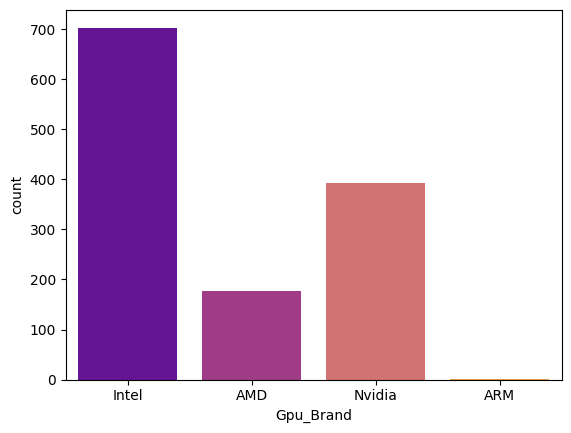

In [53]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(data = df,x = 'Gpu_Brand' ,palette = 'plasma')

<Axes: xlabel='Gpu_Brand', ylabel='count'>

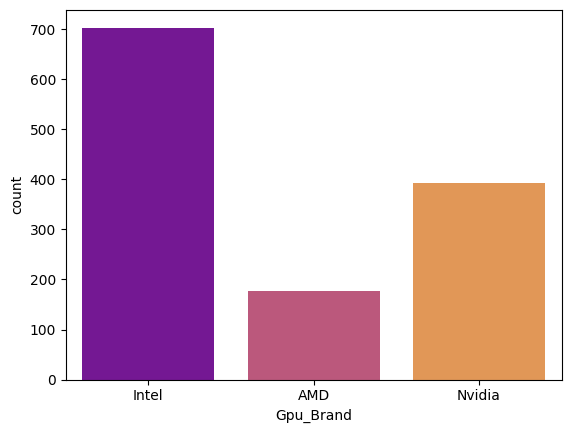

In [54]:
df = df[df['Gpu_Brand']!='ARM']
sn.countplot(data = df,x='Gpu_Brand',palette='plasma')


<Axes: xlabel='Gpu_Brand', ylabel='Price'>

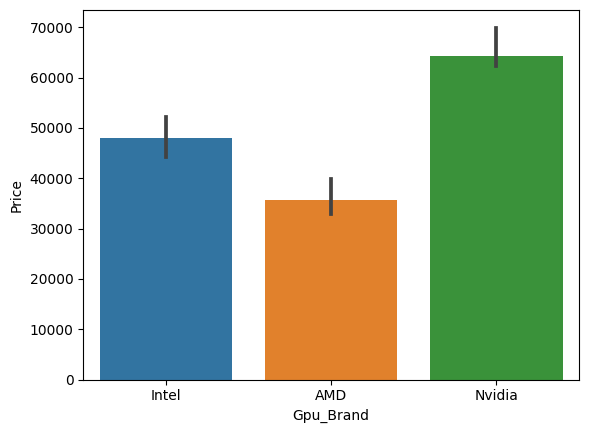

In [55]:
sn.barplot(x=df['Gpu_Brand'],y=df['Price'],estimator = np.median)

In [56]:
df = df.drop(columns = ['Gpu', 'Memory'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,total ssd,total Hybri,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,256,0,Intel


# **Analysis of operating System**

In [57]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [58]:
def subcategory(text):
    if text =='Windows 10' or text =='Windows 7' or text == 'Windows 10 S ':
        return 'windows'
    elif text =='macOS' or text == 'Mac OS X':
        return 'mac system'
    else:
        return 'others'
df['OpSys'] = df['OpSys'].apply(lambda x:subcategory(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,PPI,Cpu_brand,total ssd,total Hybri,Gpu_Brand
0,Apple,Ultrabook,8,mac system,1.37,71378.6832,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,mac system,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,others,1.86,30636.0000,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,mac system,1.83,135195.3360,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,mac system,1.37,96095.8080,0,226.983005,Intel Core i5,256,0,Intel


<Axes: xlabel='OpSys', ylabel='count'>

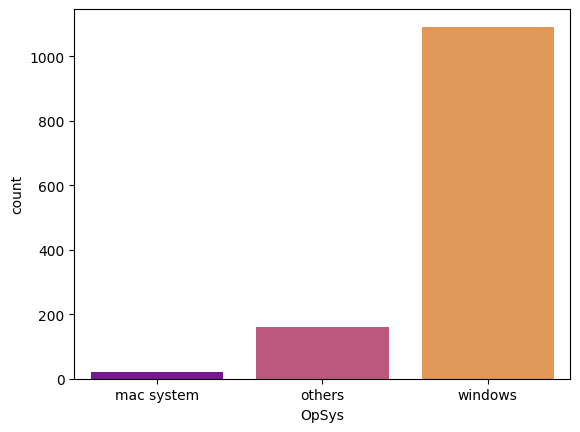

In [59]:
sn.countplot(data = df,x ='OpSys',palette = 'plasma')

<Axes: xlabel='OpSys', ylabel='Price'>

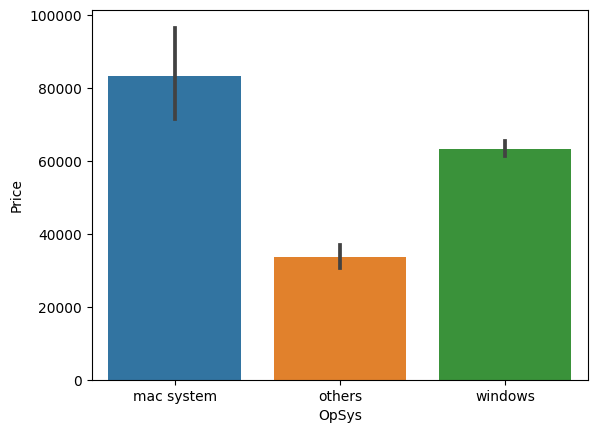

In [60]:
sn.barplot(x=df['OpSys'],y=df['Price'])

# **Analysis of the Weight**

/tmp/ipykernel_32/572135600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

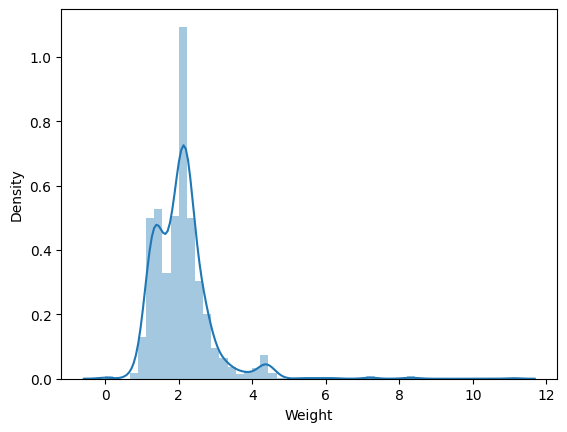

In [61]:
sn.distplot(df['Weight'])

(0.0, 5.0)

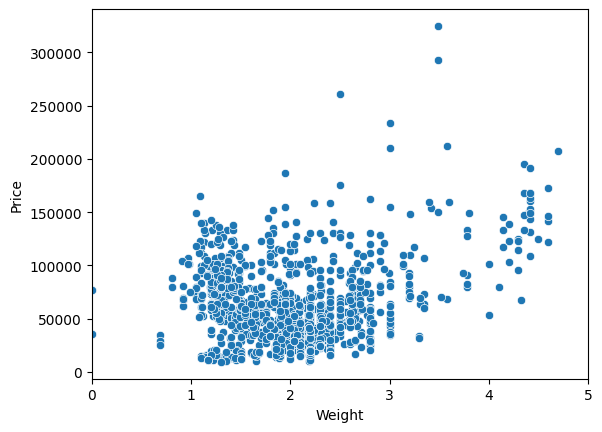

In [62]:
s=sn.scatterplot(x = df['Weight'],y = df['Price'])
s.set_xlim(0,5)

# **Price Analysis**

/tmp/ipykernel_32/2162858153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

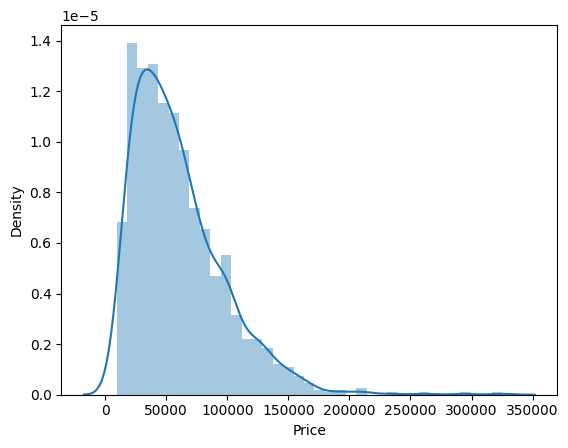

In [63]:
sn.distplot(df['Price'])

/tmp/ipykernel_32/589762661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

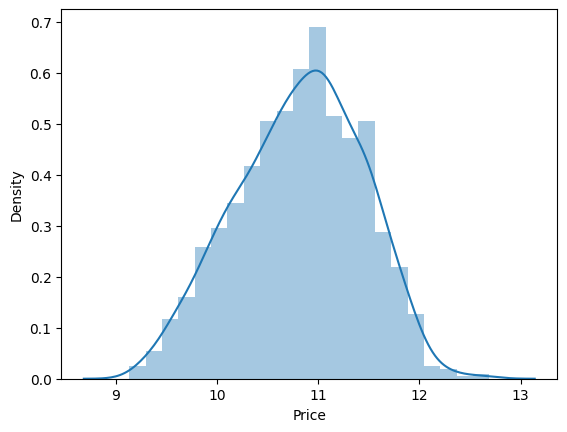

In [64]:
sn.distplot(np.log(df['Price']))

In [65]:
m = df.select_dtypes(include = 'number')
m.corr()['Price']

Ram            0.685521
Weight         0.174046
Price          1.000000
Touchscreen    0.190738
PPI            0.471335
total ssd      0.668271
total Hybri    0.007794
Name: Price, dtype: float64

<Axes: >

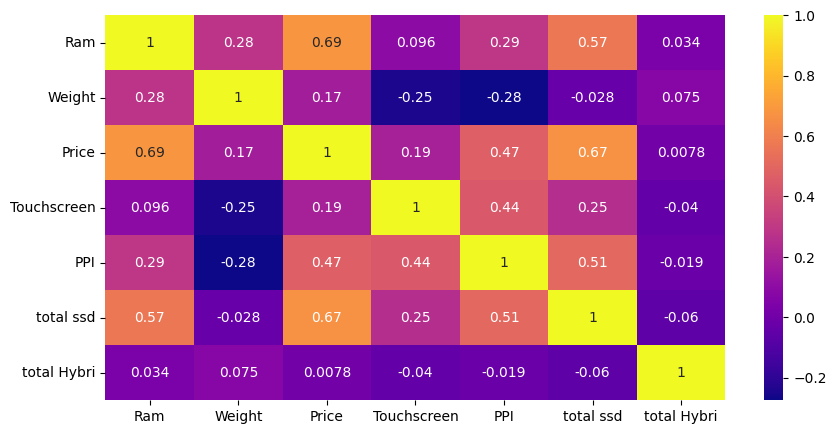

In [66]:
plt.figure(figsize=(10,5))
sn.heatmap(m.corr(),annot=True,cmap='plasma')

# **MODEL BUILDING**

In [81]:
import numpy as np
test = np.log(df['Price'])[:30]
train = df.drop(columns = ['Price',])[:30]

In [68]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size = 0.05)
x_train.shape,x_test.shape

((28, 11), (2, 11))

In [70]:
y_train.shape,y_test.shape


((1081,), (191,))

In [71]:
mapper = {i:value for i,value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touchscreen',
 6: 'PPI',
 7: 'Cpu_brand',
 8: 'total ssd',
 9: 'total Hybri',
 10: 'Gpu_Brand'}

# **Linear Regression**

In [72]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [83]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,3,7,10])], remainder = 'passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),
                 ('step2',step2)])
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('mae',metrics.mean_absolute_error(y_test,y_pred))


R2 score -21.368590733342295
mae 0.4335120317518575


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Ridge Regression**

In [84]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,3,7,10])], 
                          remainder = 'passthrough')

step2 = Ridge(alpha = 10)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(x_train,y_train)
y_pred = pipe2.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score -1.099557039600414
MAE 0.1060369718735279


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Lasso Regression**

# **DecisionTree Regressor**

In [87]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse = False,drop = 'first'),[0,1,3,7,10])],
                          remainder = 'passthrough')
step2 = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score -24.12900114965881
MAE 0.3955925240342655


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# RandomForrestClassifier

In [88]:
step1 = ColumnTransformer(transformers = [('col_tnf',OneHotEncoder(sparse =False),[0,1,3,7,10])],
                                          remainder='passthrough')
step2 = RandomForestRegressor(n_estimators = 100,
                              random_state =3,
                              max_samples = 0.5,
                              max_features = 0.75,
                              max_depth = 15)

pipe = Pipeline([
             ('step1',step1),
             ('step2',step2)])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score -17.110393227698914
MAE 0.36365392767696747


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [91]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,PPI,Cpu_brand,total ssd,total Hybri,Gpu_Brand
0,Apple,Ultrabook,8,mac system,1.37,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,mac system,1.34,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,others,1.86,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,mac system,1.83,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,mac system,1.37,0,226.983005,Intel Core i5,256,0,Intel


In [94]:
train.to_csv('traineddata.csv',index = None)


# **Hyperparameter Tunning For Random Forrest**

In [95]:
indexlist = [0,1,3,7,10]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_Brand']

In [96]:
train = pd.get_dummies(train,columns = transformlist,drop_first=True)
train.head()

,Ram,Weight,Touchscreen,PPI,total ssd,total Hybri,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,TypeName_Notebook,TypeName_Ultrabook,OpSys_others,OpSys_windows,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_other intel core,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,8,1.37,0,226.983005,128,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,8,1.34,0,127.677940,0,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,8,1.86,0,141.211998,256,0,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
3,16,1.83,0,220.534624,512,0,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,8,1.37,0,226.983005,256,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [97]:
X_train,X_test ,Y_train,Y_test = train_test_split(train,test,test_size = 0.15,random_state = 2)
X_train.shape,X_test.shape

((25, 23), (5, 23))

[Text(0.603515625, 0.9375, 'TypeName_Notebook <= 0.5\nsquared_error = 0.441\nsamples = 25\nvalue = 10.769'),
 Text(0.41015625, 0.8125, 'PPI <= 193.083\nsquared_error = 0.187\nsamples = 14\nvalue = 11.234'),
 Text(0.2890625, 0.6875, 'total ssd <= 384.0\nsquared_error = 0.058\nsamples = 8\nvalue = 10.917'),
 Text(0.203125, 0.5625, 'total ssd <= 192.0\nsquared_error = 0.036\nsamples = 6\nvalue = 10.817'),
 Text(0.125, 0.4375, 'PPI <= 134.445\nsquared_error = 0.005\nsamples = 4\nvalue = 10.938'),
 Text(0.0625, 0.3125, 'Weight <= 1.345\nsquared_error = 0.001\nsamples = 2\nvalue = 11.004'),
 Text(0.03125, 0.1875, 'squared_error = 0.0\nsamples = 1\nvalue = 11.031'),
 Text(0.09375, 0.1875, 'squared_error = 0.0\nsamples = 1\nvalue = 10.978'),
 Text(0.1875, 0.3125, 'Gpu_Brand_Nvidia <= 0.5\nsquared_error = 0.0\nsamples = 2\nvalue = 10.872'),
 Text(0.15625, 0.1875, 'squared_error = 0.0\nsamples = 1\nvalue = 10.862'),
 Text(0.21875, 0.1875, 'squared_error = -0.0\nsamples = 1\nvalue = 10.882'),
 Te

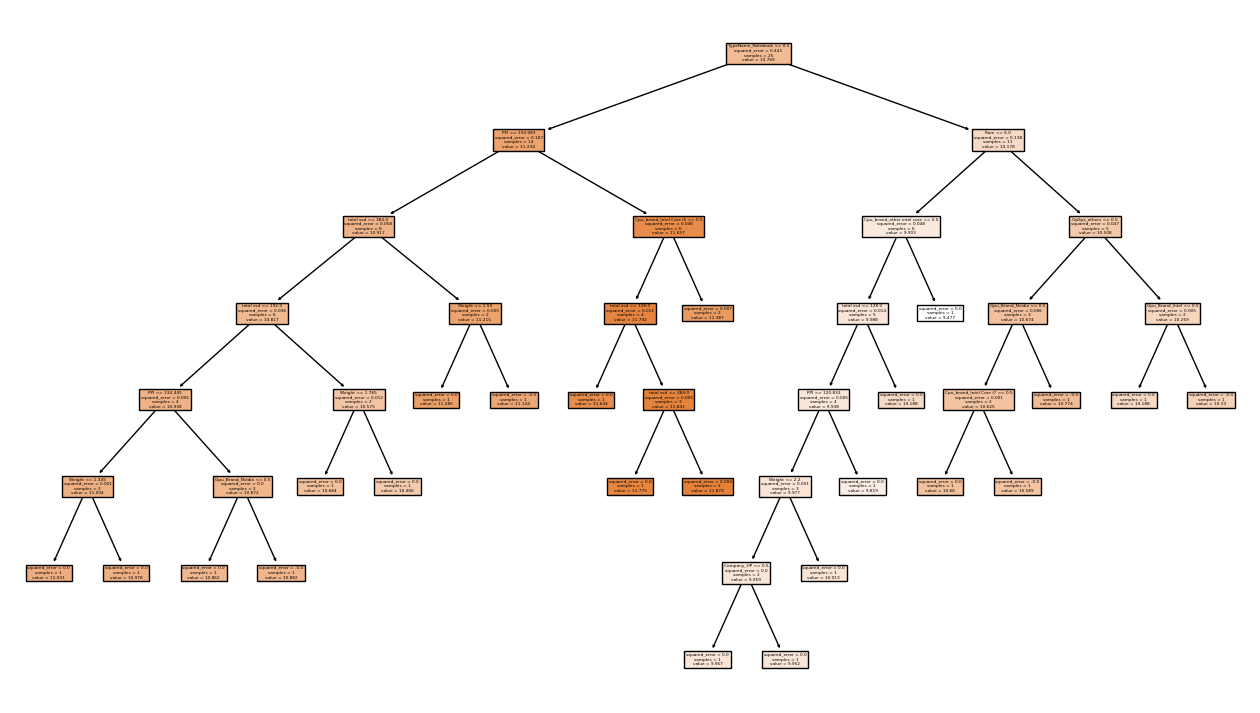

In [98]:
reg = DecisionTreeRegressor(random_state = 0)
reg.fit(X_train,Y_train)
plt.figure(figsize = (16,9))
tree.plot_tree(reg,filled = True,feature_names = train.columns)

In [100]:
path = reg.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas = path.ccp_alphas

In [111]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state = 0,ccp_alpha = alpha)
    reg.fit(X_train,Y_train)
    alphalist.append(reg)

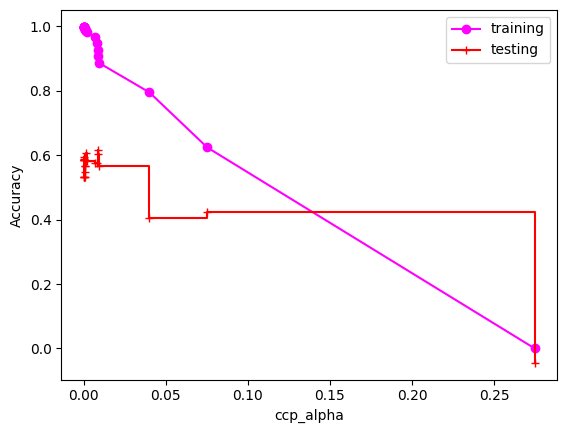

In [112]:
import matplotlib.pyplot as plt
train_score = [reg.score(X_train,Y_train) for reg in alphalist]
test_score = [reg.score(X_test,Y_test) for reg in alphalist]

plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker ='o',
        label ='training',color = 'magenta')

plt.plot(ccp_alphas,test_score,marker = '+',
        label = 'testing',color = 'red',drawstyle ='steps-post')

plt.legend()
plt.show()

**possible value of alpha can lie b/w 0.0025 and 0.0075**

In [115]:
reg = DecisionTreeRegressor(random_state = 0,ccp_alphas = 0.0085)
reg.fit(X_train,Y_train)
plt.figure(figsize = (16,9))
tree.plot_tree(reg,filled = True,feature_names = train.columns)

TypeError: DecisionTreeRegressor.__init__() got an unexpected keyword argument 'ccp_alphas'

In [ ]:
params = {
    'RandomForrest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}


In [ ]:
scores_df = pd.DataFrame(scores,columns = ['Model_name','best_score','best_estimator'])
scores_df

In [ ]:
scores

In [ ]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

# Prediction of whole Datasets

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

In [ ]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] =np.array(ans)
df

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()